# Exercises from Linear Algebra for DS

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy
import pandas as pd
from latools import vec, row
from skimage import io,color
from scipy.signal import convolve2d

import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (7,7)


## Chapter7

### Chapter 7.1

In [ ]:
# Copied from mikexcohen github companion to the book

url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]


In [ ]:

# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat
     

In [ ]:
# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close...)
print(np.mean(dataMatM[:,0]))


# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2

# and show it
plt.figure(figsize=(6,6))

plt.imshow(covMat,vmin=-clim,vmax=clim)
plt.colorbar()
plt.title('Data covariance matrix')
plt.show()

In [ ]:
# now the actual exercise

In [ ]:
S = np.std(dataMat, axis=0)
S = 1/S
S = np.eye(100) * S

In [ ]:
corMat = S @ covMat @ S

In [ ]:
clim = np.max(np.abs(corMat)) * .2



#plt.imshow(corMat,vmin=-clim,vmax=clim)
plt.imshow(corMat)
plt.colorbar()
plt.title('Data correlation matrix')
plt.show()

### Exercise 7.2

In [ ]:
plt.imshow(np.corrcoef(dataMat.T))
plt.colorbar()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(np.corrcoef(dataMat.T))
ax2.imshow(corMat)
ax3.imshow((corMat - np.corrcoef(dataMat.T)))

In [ ]:
(corMat - np.corrcoef(dataMat.T))

In [ ]:
# Well I was not exactly able to reproduce the completely gray matrix of differences
# But I guess that max dif in 0.0005 suffice

# However it is drastically bigger than Mike X Cohen'solurion (although the difference is less than 6*10^-4)
# I attribute it to the fact that I used np.std instead of np.sqrt(np.diag(covMat)), beacause that's
# where I start having discrepancies.

# I do believe that both solutions are correct, and the difference is maybe some way how numpy
# calculate std

# But it may be that I just screwed up somewhere...

### Exercise 7.3

In [ ]:
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
points = np.vstack((np.cos(theta),np.sin(theta)))

# Not my solution of how to plot a circle, but it's just too good to ignore

In [ ]:
A = np.array([[1, 0.5],
              [0, 0.5]])

In [ ]:
transformed = A @ points

In [ ]:
plt.plot(points[0,:], points[1,:], 'o')
plt.plot(transformed[0,:], transformed[1,:], 'o')

### Exercise 7.4

DNA-movie

In [ ]:
# function to draw the plots
def aframe(ph):

  # create the transformation matrix
  T = np.array([ [  1-ph/3,0 ],
                 [  0,ph   ] ])

  # apply the transformation to the points using matrix multiplication
  P1 = T@Y1
  P2 = T@Y2

  # update the lower/upper lines
  plth1.set_xdata(P1[0,:])
  plth1.set_ydata(P1[1,:])

  plth2.set_xdata(P2[0,:])
  plth2.set_ydata(P2[1,:])

  # export the plot handles
  return (plth1,plth2)
     

In [ ]:
# define XY points
th = np.linspace(0,2*np.pi,100) # th = theta (angles)
Y1 = np.vstack((th,np.cos(th)))
Y2 = np.vstack((th,np.sin(th)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))

plth1, = ax.plot(Y1[0,:],Y1[1,:],'o')
plth2, = ax.plot(Y2[0,:],Y2[1,:],'o',color=[.7,.7,.7])
ax.set_ylim([-2,2])


# define phases and run animation
phi = 1-np.linspace(-1,1-1/40,40)**2
animation.FuncAnimation(fig, aframe, phi, interval=50, repeat=True)
     

### Exercise 7.5

In [17]:
bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

In [40]:
kernelN = 50
Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel  = np.exp( -(X**2+Y**2)/50 )
kernel  = kernel / np.sum(kernel)

In [41]:
smooth_bathtub.shape

(1675, 3000, 3)

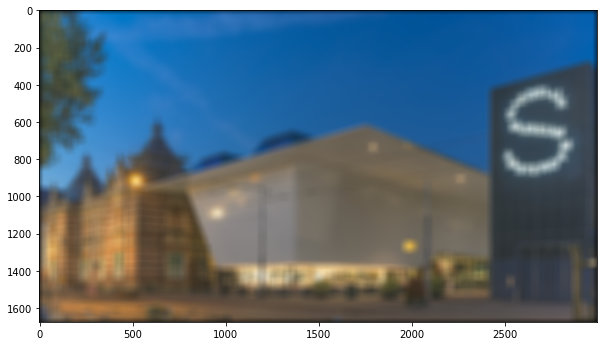

In [42]:
smooth_bathtub = np.zeros(bathtub.shape)

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')


fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

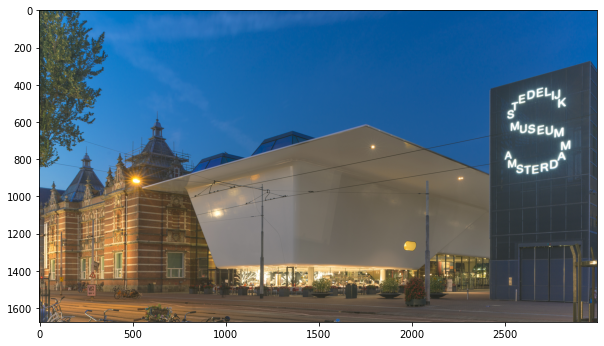

In [33]:
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub.astype(np.uint8))


### Exercise 7.6

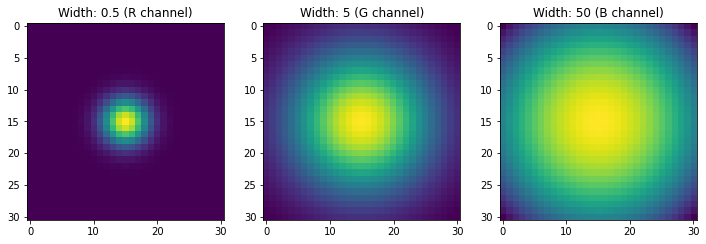

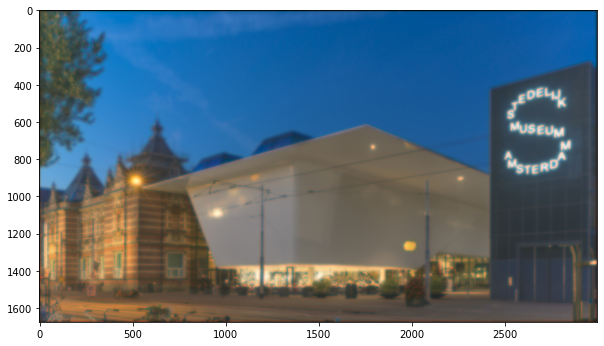

In [54]:
# layer-specific kernel widths
kernelN = 31
kernelWidths = [.5,5,50]


# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# to show the kernels
_,axs = plt.subplots(1,3,figsize=(12,6))

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):

  # create kernel
  Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
  kernel  = np.exp( -(X**2+Y**2) / kernelWidths[i] )
  kernel  = kernel / np.sum(kernel) # normalize

  # visualize the kernels
  axs[i].imshow(kernel)
  axs[i].set_title(f'Width: {kernelWidths[i]} ({"RGB"[i]} channel)')

  # now run convolution
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')

plt.show() # close the kernels figure


# show the smoothed image
fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()